<a href="https://colab.research.google.com/github/margaretmz/fashion-product-images/blob/main/1_Fashion_Product_Images_(Small)_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion Classifier

Written by Margaret Maynard-Reid, 6/13/2021

This is a classifier with [Kaggle data the Fashion Product Images (Small)](https://www.kaggle.com/paramaggarwal/fashion-product-images-small). Please refer to the data analysis notebook for details on data exploration and visualization. This notebook will focus on how to use transfer learnig to train a classifier on fashion data.

>[Fashion Classifier](#scrollTo=pIre8eMiKpS_)

>>[Imports](#scrollTo=aE-An1Tgz1g6)

>>[Data Prepraration](#scrollTo=rqYeQt6Vja-o)

>>>[Download data from Kaggle](#scrollTo=wECGg6-GKAM3)

>>>[Create dataframe](#scrollTo=F6_0HiCIRfWD)

>>>[Add image file column](#scrollTo=8H8oC7f0mzdo)

>>>[Drop data from dataframe](#scrollTo=uAyX-3Ncg38Z)

>>>>[Drop sub categories with fewer images](#scrollTo=FGzk-sfcwdUI)

>>>>[Drop rows from TopWear](#scrollTo=9Y81ouv6wfMY)

>>>[Create train and test dataframes](#scrollTo=YsZAkbyA2O1H)

>>>[Train, Validation & Test datasets](#scrollTo=eZkV4xukK7Lj)

>>[Model](#scrollTo=zPTAc2FYr00R)

>>>[Base Model](#scrollTo=mEu5gePTLunl)

>>>[Add classifier head](#scrollTo=zYWy4VLjF5Pu)

>>>[Train the model](#scrollTo=Sie7AHjzjKu8)

>>>[Learning curves](#scrollTo=93aksfsQ30Rh)

>>[Evaluate model](#scrollTo=M3Mi6WaT4HmR)

>>>[Evaluate on test generator](#scrollTo=3a2L0bAgDsf8)

>>>[Visualize model prediction](#scrollTo=rRZICLtcC_7h)

>>>[Test manually on individual images](#scrollTo=9Bx1WV2xEPyY)



## Imports

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.preprocessing import image 

In [2]:
# TensorFlow version in this notebook
tf.version.VERSION

'2.5.0'

## Data Prepraration

### Download data from Kaggle
Navigate to https://www.kaggle.com. Then go to the [Account tab of your user profile](https://www.kaggle.com/me/account) and select Create API Token. This will trigger the download of kaggle.json, a file containing your API credentials. Now you can enter your username and key below to in order to download Kaggle data from Colab. 

In [ ]:
os.environ['KAGGLE_USERNAME']="enter-your-own-user-name" #TODO remove this
os.environ['KAGGLE_KEY']="enter-your-own-user-name" #TODO: remove this

In [ ]:
!kaggle datasets download -d paramaggarwal/fashion-product-images-small

 98% 556M/565M [00:06<00:00, 121MB/s]
100% 565M/565M [00:06<00:00, 97.4MB/s]


In [ ]:
!mkdir -p datasets

In [ ]:
# TODO: clear output
!unzip fashion-product-images-small.zip -d datasets/

### Create dataframe

In [59]:
fashion = pd.read_csv("datasets/styles.csv", error_bad_lines=False, warn_bad_lines=False)

In [60]:
fashion.head(3)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch


There are total of 44,424 images in the dataset with ten columns: id, gender, masterCategory, subCategory, articleType, baseColor, season, year, usage and productDisplayName.

In [9]:
fashion.describe(include='all')

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
count,44424.000000,44424,44424,44424,44424,44409,44403,44423.000000,44107,44417
unique,NaN,5,7,45,143,46,4,NaN,8,31121
top,NaN,Men,Apparel,Topwear,Tshirts,Black,Summer,NaN,Casual,Lucera Women Silver Earrings
freq,NaN,22147,21397,15402,7067,9728,21472,NaN,34406,82
mean,29696.334301,NaN,NaN,NaN,NaN,NaN,NaN,2012.806497,NaN,NaN
std,17049.490518,NaN,NaN,NaN,NaN,NaN,NaN,2.126480,NaN,NaN
min,1163.000000,NaN,NaN,NaN,NaN,NaN,NaN,2007.000000,NaN,NaN
25%,14768.750000,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,NaN,NaN
50%,28618.500000,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN
75%,44683.250000,NaN,NaN,NaN,NaN,NaN,NaN,2015.000000,NaN,NaN


In [10]:
fashion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


### Add image file column
The id column corresponds to the image file names. We will add a new column to capture the file names so that we can use it later on with Keras ImageDataGenerator.

In [11]:
# Add a new column called 'image' with the image file names
fashion['image_filename'] = fashion.apply(lambda row: str(row['id']) + ".jpg", axis=1)

In [12]:
fashion.reset_index(drop=True)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image_filename
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg
...,...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe,17036.jpg
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop,6461.jpg
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt,18842.jpg
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume,46694.jpg


In [13]:
fashion.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image_filename
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,53759.jpg


### Drop data from dataframe
Data imbalance is a big issue so we will drop data based on sub category count, and also drop data from 'Topwear' sub category.


#### Drop sub categories with fewer images
Since this classifier will be on sub category only, we will drop the sub categories that don't have enough images for model training. 

In [14]:
fashion.subCategory.value_counts()

Topwear                     15402
Shoes                        7343
Bags                         3055
Bottomwear                   2694
Watches                      2542
Innerwear                    1808
Jewellery                    1079
Eyewear                      1073
Fragrance                    1011
Sandal                        963
Wallets                       933
Flip Flops                    913
Belts                         811
Socks                         698
Lips                          527
Dress                         478
Loungewear and Nightwear      470
Saree                         427
Nails                         329
Makeup                        307
Headwear                      293
Ties                          258
Accessories                   129
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                    104
Stoles                         90
Skin Care                      77
Skin          

In [15]:
# Number of sub categories
len(fashion.subCategory.value_counts())

45

In [16]:
# There are 9 sub categories with more than 1000 examples
fashion.groupby(['masterCategory','subCategory'])['id'].count()[lambda x: x >= 1000]

masterCategory  subCategory
Accessories     Bags            3055
                Eyewear         1073
                Jewellery       1079
                Watches         2542
Apparel         Bottomwear      2694
                Innerwear       1808
                Topwear        15402
Footwear        Shoes           7343
Personal Care   Fragrance       1011
Name: id, dtype: int64

In [17]:
# Get the count of each value
value_counts = fashion['subCategory'].value_counts()

# Select the values where the count is less than 500
to_remove = value_counts[value_counts <= 1000].index

# Keep rows where the subCatetory column is not in to_remove
fashion = fashion[~fashion.subCategory.isin(to_remove)]

In [18]:
fashion.groupby(['masterCategory','subCategory'])['id'].count()

masterCategory  subCategory
Accessories     Bags            3055
                Eyewear         1073
                Jewellery       1079
                Watches         2542
Apparel         Bottomwear      2694
                Innerwear       1808
                Topwear        15402
Footwear        Shoes           7343
Personal Care   Fragrance       1011
Name: id, dtype: int64

In [19]:
# Now there are only 9 sub categories left in the dataframe
len(fashion.subCategory.value_counts())

9

In [20]:
fashion.describe()

,id,year
count,36007.000000,36006.000000
mean,27941.314133,2012.664306
std,16565.955014,2.043775
min,1163.000000,2007.000000
25%,13305.500000,2011.000000
50%,26795.000000,2012.000000
75%,42171.500000,2015.000000
max,60000.000000,2018.000000


Now there are total of 36007 rows in the dataframe

#### Drop rows from TopWear

In [21]:
# Recall  'Topwear' has way too many rows than the other sub categories.
fashion['subCategory'].value_counts()

Topwear       15402
Shoes          7343
Bags           3055
Bottomwear     2694
Watches        2542
Innerwear      1808
Jewellery      1079
Eyewear        1073
Fragrance      1011
Name: subCategory, dtype: int64

In [22]:
drop_index = (fashion[fashion['subCategory']=='Topwear'][5000:]).index

In [23]:
drop_index[0]

14212

In [24]:
fashion.iloc[drop_index[0]]

id                                                          33297
gender                                                        Men
masterCategory                                            Apparel
subCategory                                               Topwear
articleType                                                Shirts
baseColour                                                   Blue
season                                                     Summer
year                                                         2012
usage                                                      Casual
productDisplayName    Arrow Sport Men Blue Striped Slim Fit Shirt
image_filename                                          33297.jpg
Name: 17500, dtype: object

In [25]:
fashion = fashion.drop(index=drop_index)

In [26]:
# Now 'TopWear' only has 5000 images
fashion['subCategory'].value_counts()

Shoes         7343
Topwear       5000
Bags          3055
Bottomwear    2694
Watches       2542
Innerwear     1808
Jewellery     1079
Eyewear       1073
Fragrance     1011
Name: subCategory, dtype: int64

### Create train and test dataframes
Now we are creating 2 dataframes, 1 for training which will be further split into train and validation by Keras ImageDataGenerator later on, and another dataframe for testing after model training is done.

In [27]:
# Keep 90% in train dataset
fashion_train = fashion.sample(frac=0.9, random_state=1)

In [28]:
fashion_train.describe()

,id,year
count,23044.000000,23044.000000
mean,29942.915857,2013.148716
std,16623.346986,2.188640
min,1163.000000,2007.000000
25%,15479.500000,2011.000000
50%,29239.000000,2012.000000
75%,44829.750000,2016.000000
max,60000.000000,2018.000000


In [29]:
# And the rest of them for test dataset
fashion_test = fashion.drop(fashion_train.index)

In [30]:
fashion_test.describe()

,id,year
count,2561.000000,2561.000000
mean,29991.598985,2013.224912
std,16233.721723,2.218570
min,1544.000000,2009.000000
25%,16284.000000,2011.000000
50%,28817.000000,2012.000000
75%,44234.000000,2016.000000
max,59945.000000,2018.000000


### Train, Validation & Test datasets

In [31]:
# from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Apply image augumentation
image_generator = ImageDataGenerator(rescale=1./255,
                                      horizontal_flip=True,
                                      zoom_range=0.2,
                                      shear_range=0.2,
                                      validation_split =0.2,)

In [32]:
BATCH_SIZE = 64
train_generator = image_generator.flow_from_dataframe(
    dataframe=fashion_train,
    directory="/content/datasets/images",
    x_col="image_filename",
    y_col="subCategory",
    target_size=(80, 60), 
    batch_size=BATCH_SIZE,
    subset="training"
)

Found 18435 validated image filenames belonging to 9 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="image_filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [33]:
validation_generator = image_generator.flow_from_dataframe(
    dataframe=fashion_train,
    directory="/content/datasets/images",
    x_col="image_filename",
    y_col="subCategory",
    target_size=(80, 60),
    batch_size=BATCH_SIZE,
    subset="validation"
)

Found 4608 validated image filenames belonging to 9 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="image_filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [34]:
image_generator_test = ImageDataGenerator(rescale=1./255)

In [35]:
test_generator = image_generator_test.flow_from_dataframe(
    dataframe=fashion_test,
    directory="/content/datasets/images",
    x_col="image_filename",
    y_col="subCategory",
    target_size=(80, 60),
    batch_size=BATCH_SIZE,
)

Found 2560 validated image filenames belonging to 9 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 1 invalid image filename(s) in x_col="image_filename". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [36]:
train_generator.class_indices

{'Bags': 0,
 'Bottomwear': 1,
 'Eyewear': 2,
 'Fragrance': 3,
 'Innerwear': 4,
 'Jewellery': 5,
 'Shoes': 6,
 'Topwear': 7,
 'Watches': 8}

In [37]:
test_generator.class_indices

{'Bags': 0,
 'Bottomwear': 1,
 'Eyewear': 2,
 'Fragrance': 3,
 'Innerwear': 4,
 'Jewellery': 5,
 'Shoes': 6,
 'Topwear': 7,
 'Watches': 8}

In [38]:
validation_generator.class_indices

{'Bags': 0,
 'Bottomwear': 1,
 'Eyewear': 2,
 'Fragrance': 3,
 'Innerwear': 4,
 'Jewellery': 5,
 'Shoes': 6,
 'Topwear': 7,
 'Watches': 8}

## Model

### Base Model

In [39]:
IMAGE_WIDTH, IMAGE_HEIGHT  = 60, 80
base_model = tf.keras.applications.MobileNetV2(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3),
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [40]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 80, 60, 3)]  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 40, 30, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 40, 30, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 40, 30, 32)   0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [41]:
base_model.trainable = False

### Add classifier head

In [42]:
classifier = tf.keras.Sequential([
                                  base_model,
                                  tf.keras.layers.GlobalAveragePooling2D(),
                                  tf.keras.layers.Dense(128, activation='relu'),
                                  tf.keras.layers.Dense(9, activation='softmax')
])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 3, 2, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               163968    
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 1161      
Total params: 2,423,113
Trainable params: 165,129
Non-trainable params: 2,257,984
_________________________________________________________________


In [43]:
classifier.compile(optimizer='adam', 
                   loss='categorical_crossentropy', 
                   metrics=['accuracy'])

In [44]:
len(train_generator)//BATCH_SIZE

4

### Train the model

In [45]:
NUM_EPOCHS = 20

STEPS_PER_EPOCH = len(train_generator)//BATCH_SIZE
VALIDATION_STEPS = len(validation_generator)//BATCH_SIZE
classifier.fit(
    train_generator,
    steps_per_epoch=STEPS_PER_EPOCH, 
    validation_data=validation_generator,
    validation_steps=VALIDATION_STEPS, 
    epochs=NUM_EPOCHS
)

Epoch 1/20
4/4 [==============================] - 18s 448ms/step - loss: 2.0201 - accuracy: 0.3672 - val_loss: 1.0611 - val_accuracy: 0.6719
Epoch 2/20
4/4 [==============================] - 1s 177ms/step - loss: 1.0654 - accuracy: 0.6562 - val_loss: 1.0767 - val_accuracy: 0.6875
Epoch 3/20
4/4 [==============================] - 1s 182ms/step - loss: 0.8454 - accuracy: 0.7148 - val_loss: 0.7461 - val_accuracy: 0.7812
Epoch 4/20
4/4 [==============================] - 1s 174ms/step - loss: 0.6231 - accuracy: 0.8203 - val_loss: 0.6646 - val_accuracy: 0.8125
Epoch 5/20
4/4 [==============================] - 1s 178ms/step - loss: 0.5602 - accuracy: 0.8398 - val_loss: 0.5178 - val_accuracy: 0.8281
Epoch 6/20
4/4 [==============================] - 1s 174ms/step - loss: 0.4958 - accuracy: 0.8633 - val_loss: 0.4862 - val_accuracy: 0.8594
Epoch 7/20
4/4 [==============================] - 1s 173ms/step - loss: 0.3904 - accuracy: 0.8711 - val_loss: 0.5824 - val_accuracy: 0.8281
Epoch 8/20
4/4 [===

### Learning curves

In [46]:
# Display learning curves
def display_learning_curves(history, title):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(NUM_EPOCHS)

  plt.plot(epochs_range, acc, label='Train accuracy')
  plt.plot(epochs_range, val_acc, label='Val accuracy')
  plt.title(title)
  plt.legend(loc='upper left')
  plt.figure()

  plt.show()

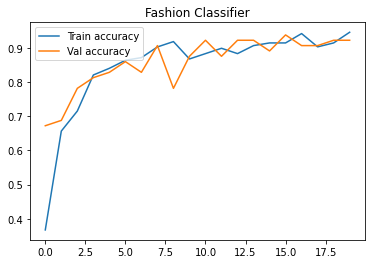

<Figure size 432x288 with 0 Axes>

In [47]:
# Display learning curves 
display_learning_curves(classifier.history, "Fashion Classifier")

## Evaluate model

### Evaluate on test generator
We will call evaluate on test generator dataset to evaluate how well the model is performing. The test dataset hasn't been seen by the model during the training, so it's a good way to test the model performance. 

In [50]:
classifier.evaluate(test_generator)

40/40 [==============================] - 1s 31ms/step - loss: 0.2290 - accuracy: 0.9387


[0.2290060818195343, 0.938671886920929]

Running the classifier on the test data results in over 93% accuracy which is pretty good.

### Visualize model prediction
Let's visualize 15 images from the test generator, and print both the true label and predicted label. First we need to preprocess the image into a format that is suitable for the classifier to take as an input

In [51]:
# An image preprocess function 
def preprocess_image(img):
  img_array = image.array_to_img(img)
  x=np.expand_dims(img_array, axis=0)
  x = preprocess_input(x) # preprocess with the preprocess_input() function from the pre-trained model
  return x

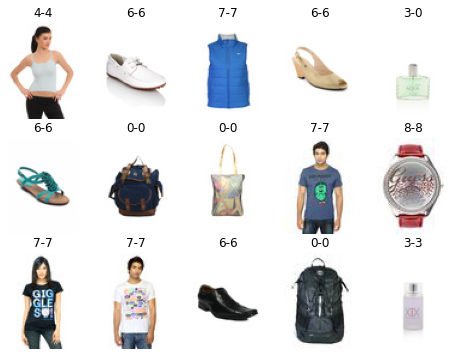

In [52]:
plt.figure(figsize=(8,6))
for i in range(15):
  ax = plt.subplot(3, 5, i+1)
  imgs, labels = next(test_generator)[:15]
  img = imgs[i]
  preprocessed_img = preprocess_image(img)
  label = np.argmax(labels[i])
  pred = np.argmax(classifier.predict(preprocessed_img))
  plt.imshow(img)
  plt.title(str(label) + "-" + str(pred))
  plt.axis("off")

In [53]:
test_generator.class_indices

{'Bags': 0,
 'Bottomwear': 1,
 'Eyewear': 2,
 'Fragrance': 3,
 'Innerwear': 4,
 'Jewellery': 5,
 'Shoes': 6,
 'Topwear': 7,
 'Watches': 8}

### Test manually on individual images
We can also spot check manually how the classifier is doing.

First I will get some image filenames by looking at the 'Topwear' sub category.

In [54]:
fashion_test[fashion_test.subCategory=='Topwear'].head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image_filename
61,15528,Men,Apparel,Topwear,Tshirts,Black,Fall,2011.0,Casual,Puma Men Scribble Black Tshirts,15528.jpg
140,51455,Women,Apparel,Topwear,Shrug,Pink,Summer,2012.0,Casual,Tonga Women Pink Printed Shrug,51455.jpg
160,10859,Men,Apparel,Topwear,Tshirts,Navy Blue,Fall,2011.0,Casual,Wrangler Men Furious Rides Navy Blue T-Shirts,10859.jpg
180,31782,Women,Apparel,Topwear,Tops,Blue,Summer,2012.0,Casual,Lee Women Paula Blue Top,31782.jpg
206,27283,Women,Apparel,Topwear,Kurtas,Magenta,Fall,2011.0,Ethnic,Mother Earth Women Magenta Kurta,27283.jpg


In [55]:
# img_14 = image.load_img("datasets/images/59263.jpg") # 8 watch
# img_2 = image.load_img("datasets/images/21379.jpg") # 1 bottomwear
img = image.load_img("datasets/images/27283.jpg")
# img = image.load_img("shoe.jpeg", target_size=(80,60)) # 10 shoe - just an image I downloaded from the internet

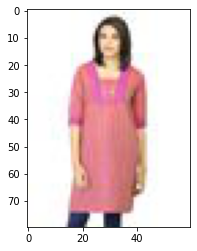

In [56]:
plt.imshow(img)

In [57]:
np.argmax(classifier.predict((preprocess_image(img))))

7

The model correctly predicted it as 7 - 'Topwear'.

In [58]:
test_generator.class_indices

{'Bags': 0,
 'Bottomwear': 1,
 'Eyewear': 2,
 'Fragrance': 3,
 'Innerwear': 4,
 'Jewellery': 5,
 'Shoes': 6,
 'Topwear': 7,
 'Watches': 8}